In [24]:
import numpy as np
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from collections import Counter
import GetOldTweets3 as got
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
#nltk.download()

In [3]:
def get_old_tweet():
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('corona virus') \
    .setSince("2020-06-1")\
    .setUntil("2020-06-30")\
    .setMaxTweets(1000)
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)
	 
    tweets=[]
    for text in tweet:
        tweets.append(text.text)
    #print(tweet.text)
    return tweets

In [4]:
text=""
tweets=get_old_tweet()

In [5]:
#text

In [6]:
length=len(tweets)

In [7]:
length

1000

In [8]:
#tweets

In [9]:
for i in range(0,length):
    text=tweets[i]+ " " +text

In [10]:
#text

In [11]:
tokenized_words = word_tokenize(text)

In [12]:
#tokenized_words

In [13]:
punc=string.punctuation

In [14]:
final=[]
for word in tokenized_words:
    if word not in punc:
        final.append(word)
    else:
        continue


In [15]:
#final

In [16]:
finals_word=[]
for word in final:
    if word not in stopwords.words('english'):
        finals_word.append(word)
    else:
        continue

In [17]:
#finals_word

In [18]:
emotion_list=[]
with open("emotions.txt","r") as file:
    for line in file:
        clean_line=line.replace("/n","").replace(",",'').replace("'",'').strip()
        word,emotion=clean_line.split(":")
        #print(emotion)
        
        if word in finals_word:
            emotion_list.append(emotion)

In [23]:
#emotion_list

In [20]:
w=Counter(emotion_list)

In [21]:
w

Counter({' attracted': 5,
         ' sad': 6,
         ' angry': 2,
         ' fearless': 1,
         ' average': 2,
         ' attached': 2,
         ' free': 2,
         ' happy': 5,
         ' hated': 1,
         ' entitled': 1,
         ' powerless': 3,
         ' lost': 1,
         ' safe': 1,
         ' adequate': 1,
         ' fearful': 5,
         ' independent': 1,
         ' surprise': 1,
         ' focused': 1,
         ' loved': 1})

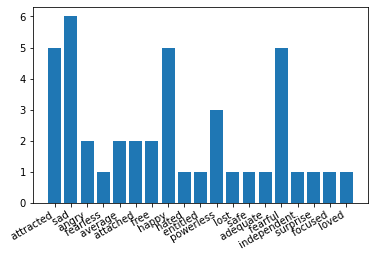

In [22]:
fig,ax1=plt.subplots()
ax1.bar(w.keys(),w.values())
fig.autofmt_xdate()  ## used to rotatex axis values
plt.show()